In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy
from scipy import stats
diabete = pd.read_csv('diabetes (2).csv')
diabete.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:>

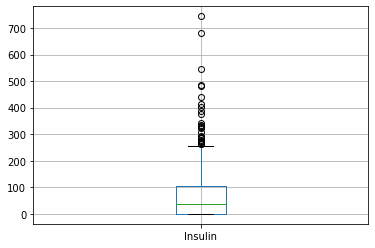

In [58]:
outcome_0 = diabete[diabete["Outcome"] == 0]
outcome_1 = diabete[diabete["Outcome"] == 1]
outcome_0.boxplot('Insulin')

<AxesSubplot:>

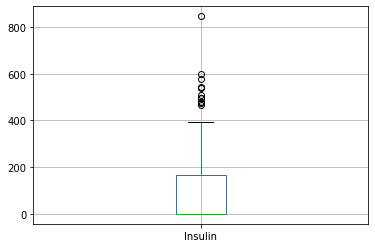

In [59]:
outcome_1.boxplot('Insulin')

In [60]:
med_ins0=outcome_0['Insulin'].median()
outcome_0['Insulin']=outcome_0['Insulin'].replace(0,med_ins0)
med_ins1=outcome_1['Insulin'].median()
outcome_1['Insulin']=outcome_1['Insulin'].replace(1,med_ins0)
diabete = outcome_0.append(outcome_1)
diabete.head()

/tmp/ipykernel_28/1985105798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outcome_0['Insulin']=outcome_0['Insulin'].replace(0,med_ins0)
/tmp/ipykernel_28/1985105798.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outcome_1['Insulin']=outcome_1['Insulin'].replace(1,med_ins0)
/tmp/ipykernel_28/1985105798.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  diabete = outcome_0.append(outcome_1)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,39,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,39,25.6,0.201,30,0
7,10,115,0,0,39,35.3,0.134,29,0
10,4,110,92,0,39,37.6,0.191,30,0


In [61]:
category_age = pd.cut(diabete.Age,bins=[0,35,65,99],labels=['YoungAdult','Adult','Elderly'])
diabete.insert(8,'AgeGroup',category_age)

In [62]:
category_ins = pd.cut(diabete.Insulin,bins=[0,300,600,900],labels=['Low_Insulin','Mid_Insulin','High_Insulin'])
diabete.insert(6,'InsulinLevel',category_ins)
diabete.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,InsulinLevel,DiabetesPedigreeFunction,Age,AgeGroup,Outcome
1,1,85,66,29,39,26.6,Low_Insulin,0.351,31,YoungAdult,0
3,1,89,66,23,94,28.1,Low_Insulin,0.167,21,YoungAdult,0
5,5,116,74,0,39,25.6,Low_Insulin,0.201,30,YoungAdult,0
7,10,115,0,0,39,35.3,Low_Insulin,0.134,29,YoungAdult,0
10,4,110,92,0,39,37.6,Low_Insulin,0.191,30,YoungAdult,0


In [63]:
tStat, pValue = stats.ttest_ind(outcome_0['Glucose'], outcome_1['Glucose'], equal_var=False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:2.6441613495403223e-36 T-Statistic:-13.751537067396411


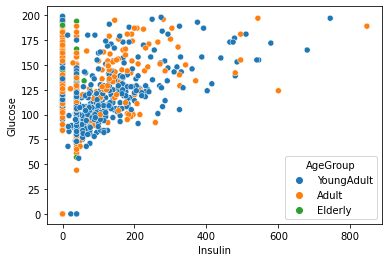

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data = diabete, x = "Insulin", y = "Glucose",hue = "AgeGroup")
plt.show()

<AxesSubplot:xlabel='InsulinLevel', ylabel='Glucose'>

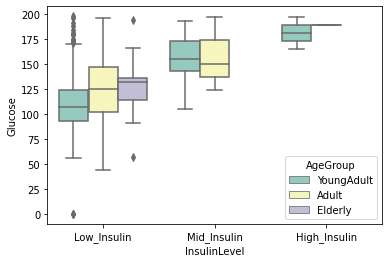

In [65]:
sns.boxplot(x="InsulinLevel", y="Glucose", hue="AgeGroup", data=diabete, palette="Set3")

In [66]:
diabete1 = diabete[['Glucose','AgeGroup','InsulinLevel']]
diabete1.head()

,Glucose,AgeGroup,InsulinLevel
1,85,YoungAdult,Low_Insulin
3,89,YoungAdult,Low_Insulin
5,116,YoungAdult,Low_Insulin
7,115,YoungAdult,Low_Insulin
10,110,YoungAdult,Low_Insulin


In [67]:
pip install bioinfokit --upgrade

Requirement already up-to-date: bioinfokit in /opt/conda/lib/python3.8/site-packages (2.0.8)
Note: you may need to restart the kernel to use updated packages.


In [68]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=diabete, res_var='Glucose', anova_model='Glucose~C(AgeGroup)+C(InsulinLevel)+C(AgeGroup):C(InsulinLevel)')
res.anova_summary

/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  warnings.warn('covariance of constraints does not have full '


,df,sum_sq,mean_sq,F,PR(>F)
C(AgeGroup),2.0,50856.204808,25428.102404,32.429142,1.905980e-08
C(InsulinLevel),2.0,110615.980712,55307.990356,70.535765,3.054868e-16
C(AgeGroup):C(InsulinLevel),4.0,3469.911911,867.477978,1.106318,3.314236e-01
Residual,623.0,488502.222742,784.112717,NaN,NaN


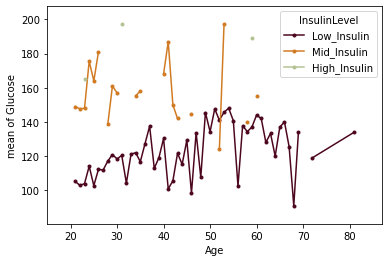

In [69]:
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(x=diabete['Age'], trace=diabete['InsulinLevel'], response=diabete['Glucose'], 
    colors=['#4c061d','#d17a22', '#b4c292'])
plt.show()

In [70]:
res = stat()
res.tukey_hsd(df=diabete, res_var='Glucose', xfac_var='AgeGroup', anova_model='Glucose~C(InsulinLevel)+C(AgeGroup)+C(InsulinLevel):C(AgeGroup)')
res.tukey_summary

/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:1900: RuntimeWarning: invalid value encountered in true_divide
  F /= J
/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/opt/conda/lib/python3.8/sit

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,YoungAdult,Adult,14.324598,8.515279,20.133918,8.192718,0.001000
1,YoungAdult,Elderly,14.070455,-8.081939,36.222848,2.110369,0.295835
2,Adult,Elderly,0.254144,-22.213697,22.721984,0.037583,0.900000


In [71]:
res.tukey_hsd(df=diabete, res_var='Glucose', xfac_var='InsulinLevel', anova_model='Glucose ~ C(AgeGroup) + C(InsulinLevel) + C(AgeGroup):C(InsulinLevel)')
res.tukey_summary

/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Low_Insulin,Mid_Insulin,41.000992,29.399548,52.602436,11.742299,0.001000
1,Low_Insulin,High_Insulin,68.961776,30.883241,107.040312,6.017264,0.001000
2,Mid_Insulin,High_Insulin,27.960784,-11.662079,67.583648,2.344630,0.222687


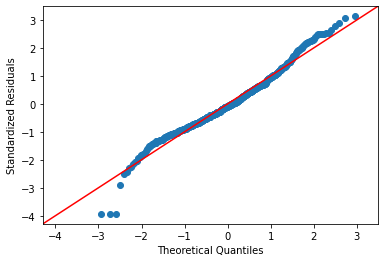

In [72]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

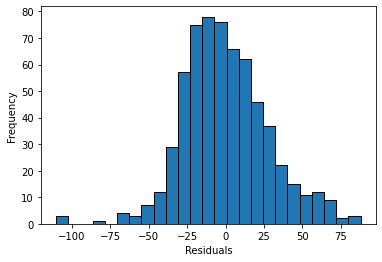

In [73]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [74]:
pip install --upgrade opencv-python

Requirement already up-to-date: opencv-python in /opt/conda/lib/python3.8/site-packages (4.5.5.64)
Note: you may need to restart the kernel to use updated packages.


In [75]:
import scipy.stats as stats
w, pvalue = stats.shapiro(res.anova_model_out.resid)
print(w, pvalue)

0.9775135517120361 2.962094924896519e-08


In [76]:
res = stat()
res.levene(df=diabete, res_var='Glucose', xfac_var=['AgeGroup', 'InsulinLevel'])
res.levene_summary

/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Parameter,Value
0,Test statistics (W),NaN
1,Degrees of freedom (Df),8.0
2,p value,NaN


In [77]:
res = stat()
res.levene(df=diabete,res_var='Glucose',xfac_var='AgeGroup')
res.levene_summary

,Parameter,Value
0,Test statistics (W),5.4248
1,Degrees of freedom (Df),2.0000
2,p value,0.0046


In [78]:
res = stat()
res.levene(df=diabete,res_var='Glucose',xfac_var='InsulinLevel')
res.levene_summary

,Parameter,Value
0,Test statistics (W),1.2127
1,Degrees of freedom (Df),2.0000
2,p value,0.2981


In [79]:
diabete.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,91.783854,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,108.121136,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,39.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,39.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [80]:
X = diabete[['Insulin', 'Pregnancies', 'Age', 'DiabetesPedigreeFunction']]
y = diabete['Glucose']

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [82]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [83]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Insulin,0.093708
Pregnancies,0.036723
Age,0.718811
DiabetesPedigreeFunction,5.084430


In [84]:
y_pred = regressor.predict(X_test)
print(regressor.intercept_)

85.18682362720634


In [85]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
419,129,117.313649
191,123,124.979930
174,75,116.016232
33,92,110.144368
66,109,116.848834
...,...,...
727,141,106.856851
736,126,114.145336
373,105,113.183125
61,133,114.887034


In [86]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 22.990080682333573
MSE: 835.0926609520016
RMSE: 28.897969841357394


In [88]:
import statistics
x = statistics.mean(diabete['Glucose'])
print(x)

120.89453125
